**Ciencia y analítica de datos**

Carlos Álvarez


Regresión Logística

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Extraemos las columnas numéricas del df
numeric_cols_names_list = [col  for col in data_df.columns if data_df[col].dtype in ['int64', 'float64']]
# Extraemos las columnas NO numéricas del df
non_numeric_cols_names_list = [col  for col in data_df.columns if data_df[col].dtype not in ['int64', 'float64']]

In [ ]:
print(f"""
      El dataframe de Cáncer de pulmón cuenta con:

            * COLUMNAS: {list(data_df.columns)}
            * TOTAL DE COLUMNAS: {len(data_df.columns)}

      De las cuales:

            * COLUMNAS NÚMERICAS: {numeric_cols_names_list}
            * COLUMNAS NÚMERICAS #: {len(numeric_cols_names_list)}

            * COLUMNAS NO NÚMERICAS: {non_numeric_cols_names_list}
            * COLUMNAS NO NÚMERICAS #: {len(non_numeric_cols_names_list)}
      """)


      El dataframe de Cáncer de pulmón cuenta con:
      
            * COLUMNAS: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
            * TOTAL DE COLUMNAS: 31
      
      De las cuales:
      
            * COLUMNAS NÚMERICAS: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_s

In [ ]:
# Como el método "describe" no calcula el coeficiente de asimetría (Skewness) ni el coeficiente de Kurtosis
# Entonces los calculamos por separado

# Calculamos el coeficiente de asimetría
numeric_cols_skewness_coeff_df = pd.DataFrame(data_df[numeric_cols_names_list].skew(), columns=["skewness"])

# Calculamos el coeficiente de Kurtosis
numeric_cols_kurtosis_coeff_df = pd.DataFrame(data_df[numeric_cols_names_list].kurtosis(), columns=["kurtosis"])
# Ahora ejecutamos un join/merge para unir ambos coeficiente en un df
skewness_and_kurtosis_df = pd.merge(
    left=numeric_cols_skewness_coeff_df,
    right=numeric_cols_kurtosis_coeff_df,
    right_index=True,
    left_index=True
    )
# Ahora ejecutamos un join/merge para tener todas las estadisticas en una sola tabla
all_statistics_df = pd.merge(
    left=data_df.describe().T, # Tabla de estadísticas descriptivas comúnes
    right=skewness_and_kurtosis_df,
    right_index=True,
    left_index=True
)
# Finalmente miramos las estadisticas de todas las variables numéricas
all_statistics_df

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.942380,0.845522
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.650450,0.758319
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0.990650,0.972214
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,1.645732,3.652303
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.456324,0.855975
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,1.190123,1.650130
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,1.401180,1.998638
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,1.171180,1.066556
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.725609,1.287933
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,1.304489,3.005892


In [ ]:
data_df.describe(include="object").T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
# Count unique values in each column
unique_counts = pd.DataFrame(data_df.nunique(), columns=["Conteo de valores únicos"]).sort_values(by=["Conteo de valores únicos"], ascending=True)
unique_counts

,Conteo de valores únicos
diagnosis,2
smoothness_worst,411
symmetry_mean,432
radius_mean,456
radius_worst,457
smoothness_mean,474
texture_mean,479
concave points_worst,492
symmetry_se,498
fractal_dimension_mean,499


1c) Búsqueda de valores faltantes.

In [ ]:
# Calculamos el % de valores nulos por columna
pd.DataFrame((data_df.isna().sum() / data_df.shape[0]) * 100, columns=["Porcentaje de Valores Faltantes"])

,Porcentaje de Valores Faltantes
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

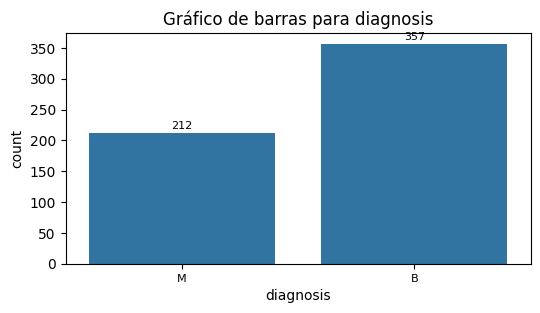

In [ ]:
cat_var="diagnosis"
plt.figure(figsize=(6, 3))
ax = sns.countplot(data=data_df, x=cat_var)
ax.tick_params(axis='x', labelsize=8)
ax.set_title(f"Gráfico de barras para {cat_var}")

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

In [ ]:
# Calculamos la matriz de correlación
corr_df = data_df[numeric_cols_names_list].corr()

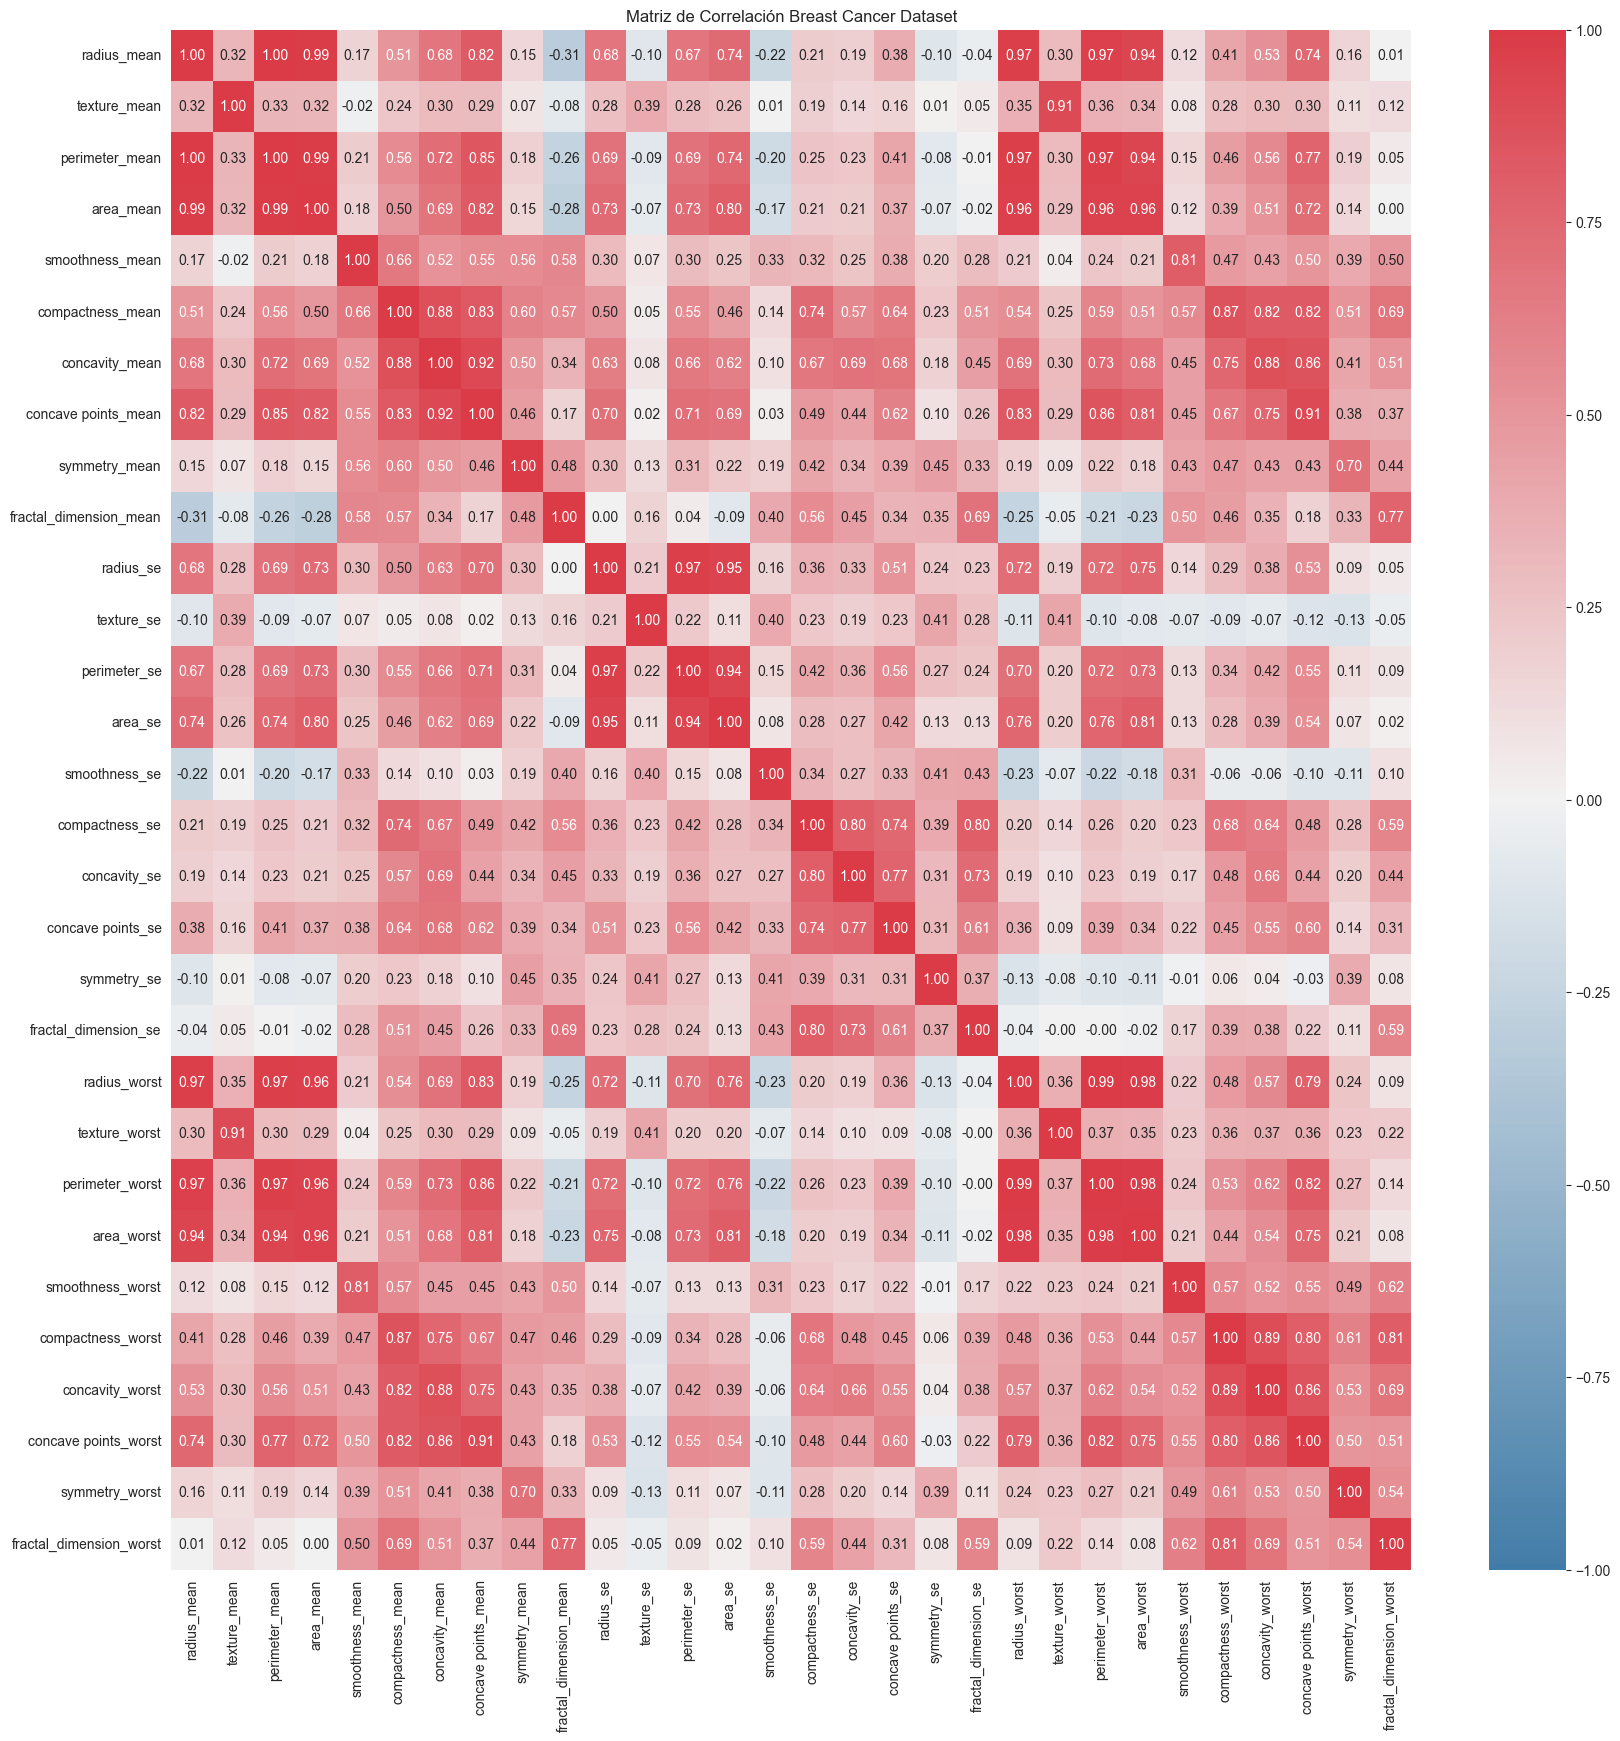

In [ ]:
# Para el tamaño del gráfico
plt.figure(figsize=(20, 20))

# Para crear un paleta de colores divergente
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Para le divergencia de los colores
vmin = -1 # Para que la diveregencia de los colores esten en función de un valor mínimo
vmax = 1 # Para que la diveregencia de los colores esten en función de un valor máximo

# Generamos el gráfico
sns.heatmap(corr_df,
            cmap=cmap, # La paleta de coores diveregente
            vmin=vmin, # El valor mínimo de diveregencia de color
            vmax=vmax, # El valor máximo de diveregencia de color
            xticklabels=corr_df.columns, # Las etiquetas del eje x
            yticklabels=corr_df.columns,# Las etiquetas del eje y
            center=0, annot=True, fmt=".2f", # Para añadir los valores a la matriz dibujada
            )
# Título del gráfico
plt.title(f'Matriz de Correlación Breast Cancer Dataset', fontsize=12)
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

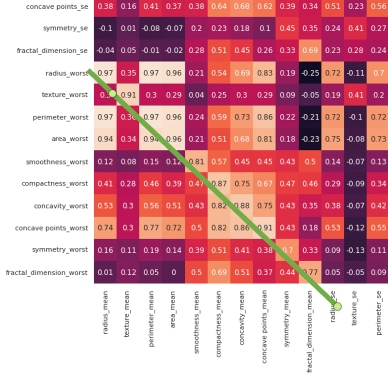

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
worst_columns_to_drop = [x for x in numeric_cols_names_list if x.endswith("_worst")]
data_with_no_worst_columns_df = data_df.drop(columns=worst_columns_to_drop).copy()

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




In [ ]:
vars_to_pair_plot = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
    ]

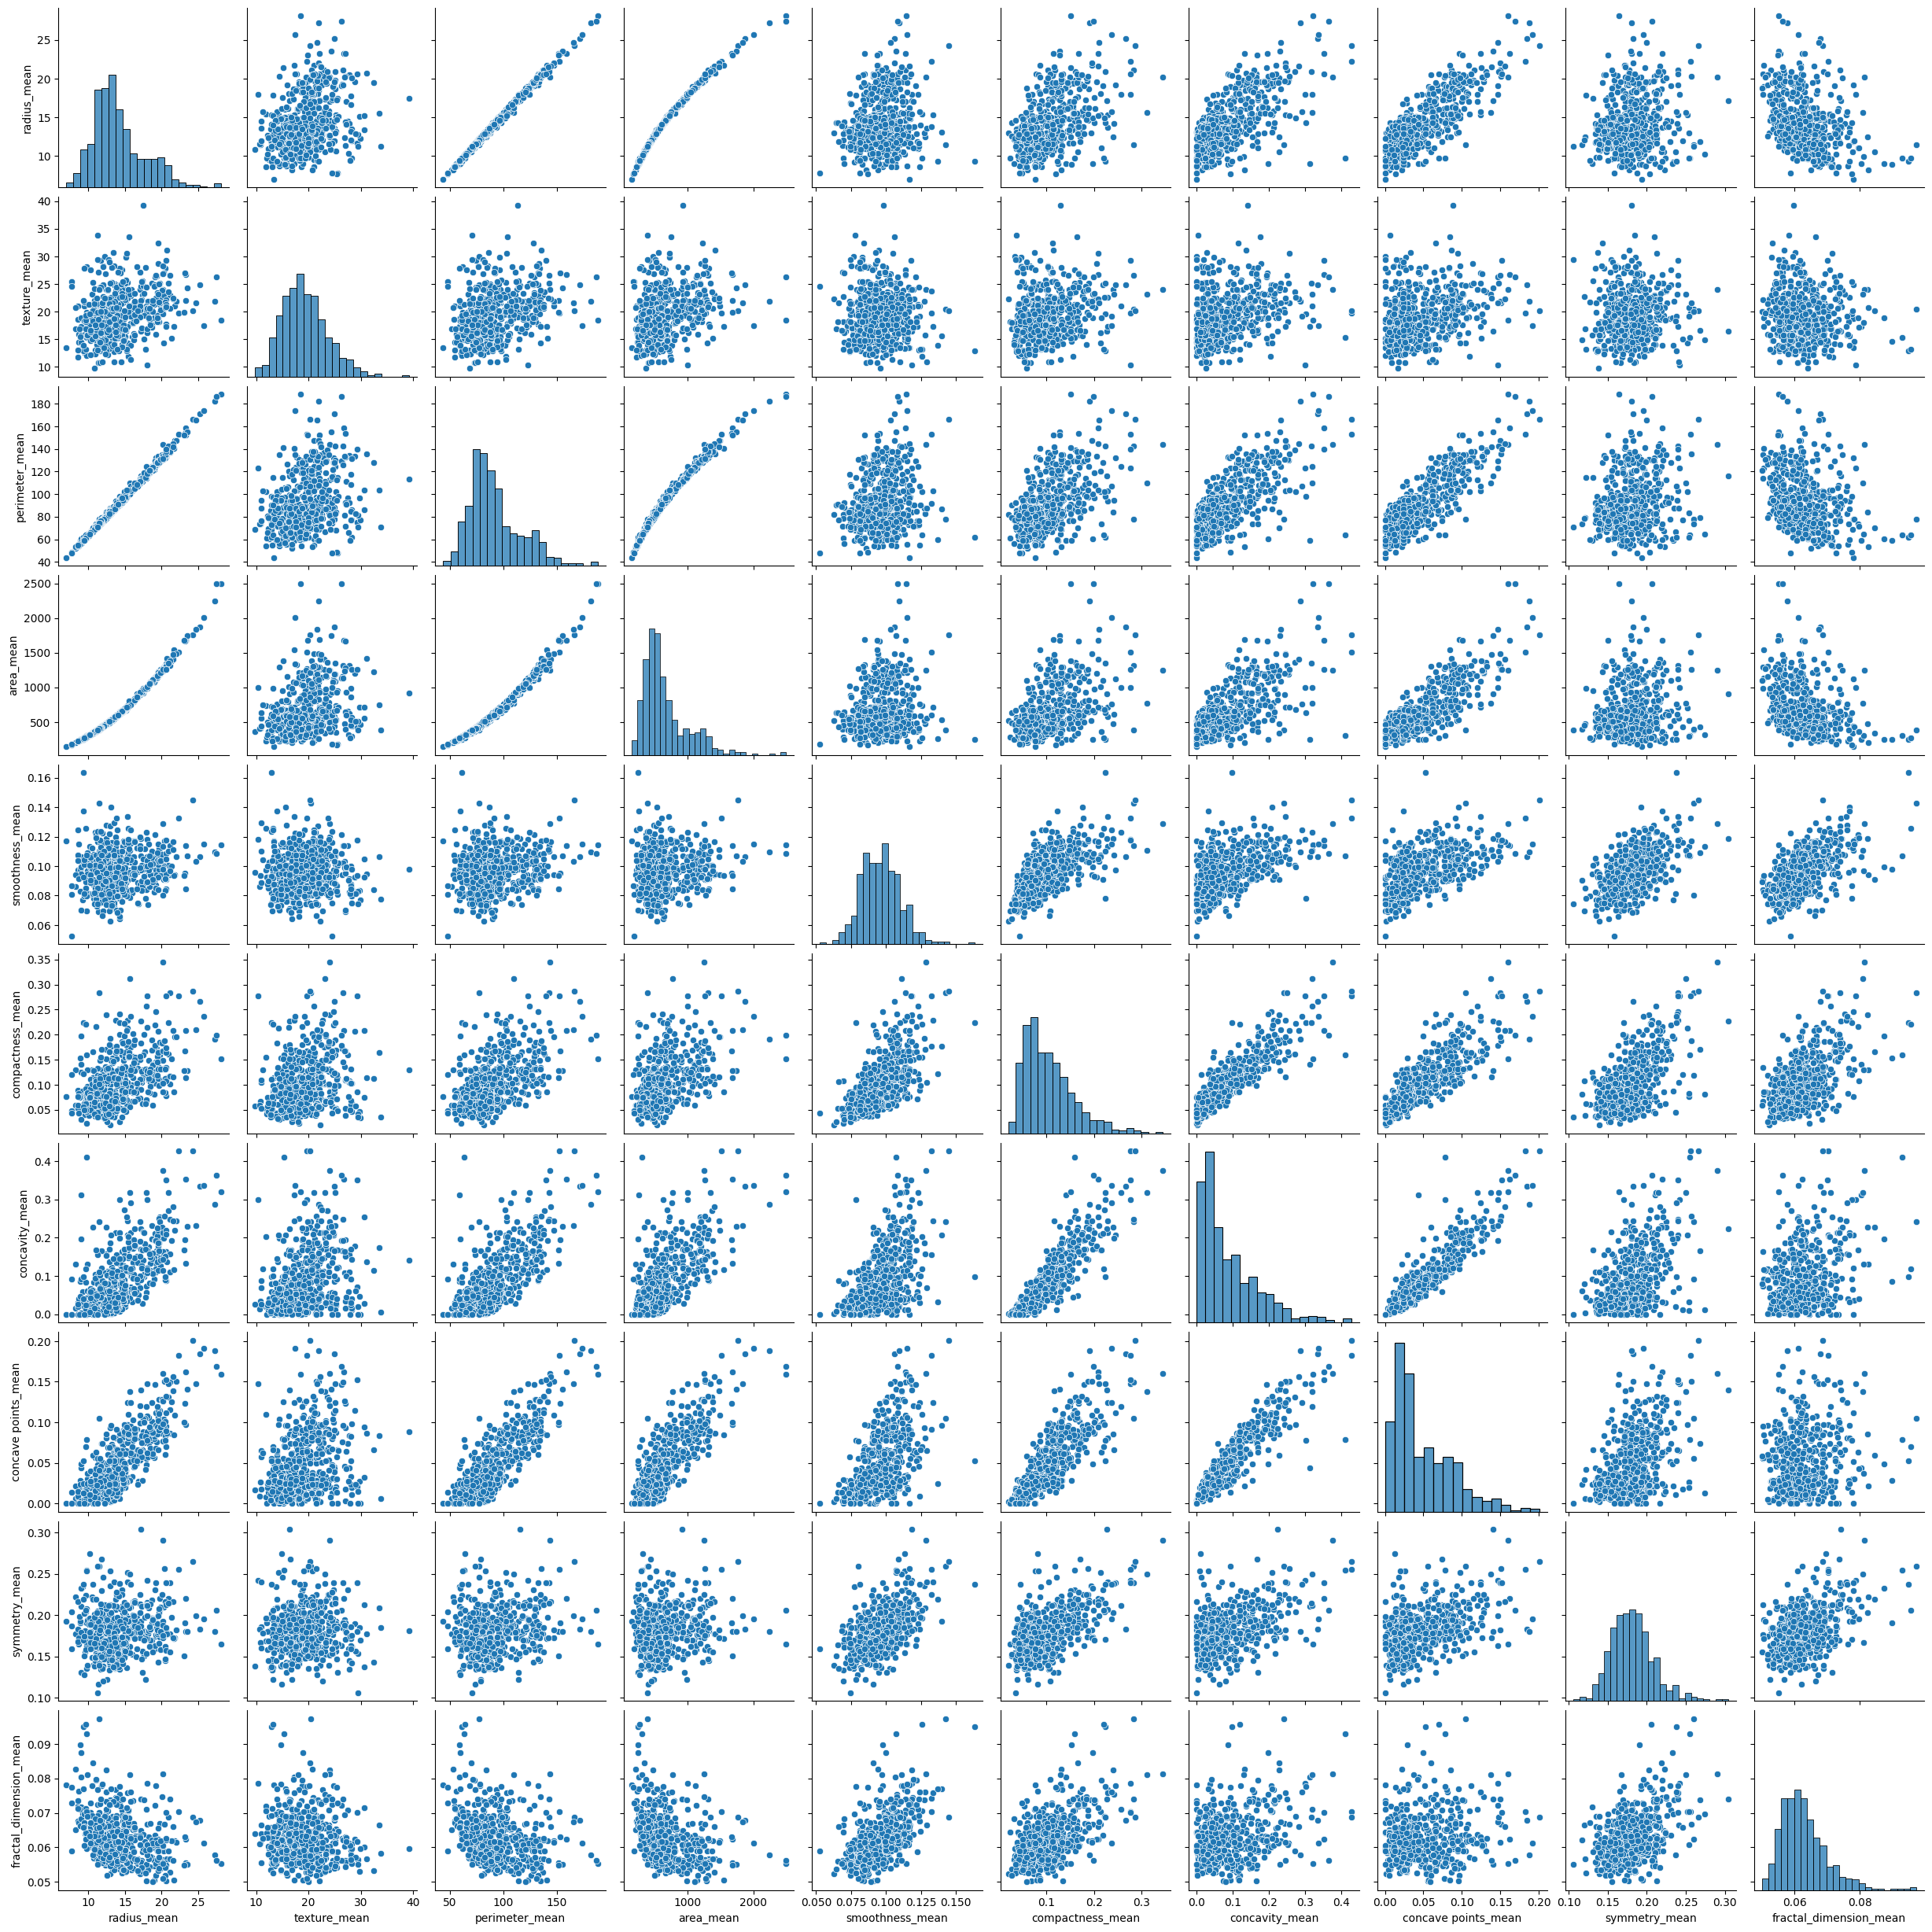

In [ ]:
sns.pairplot(data=data_with_no_worst_columns_df[vars_to_pair_plot])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`


Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


In [ ]:
# Calculamos la matriz de correlación
vars_to_pair_plot_corr_df = data_with_no_worst_columns_df[vars_to_pair_plot].corr()

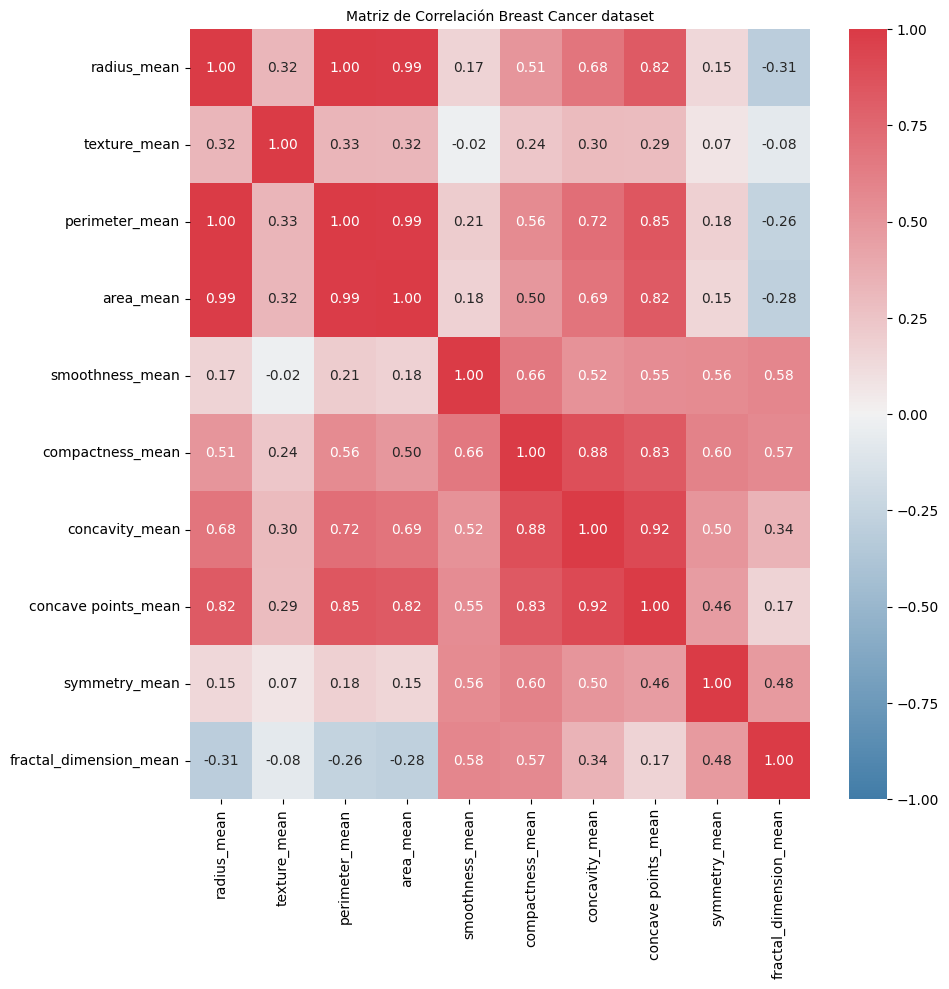

In [ ]:
# Para el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Para crear un paleta de colores divergente
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Para le divergencia de los colores
vmin = -1 # Para que la diveregencia de los colores esten en función de un valor mínimo
vmax = 1 # Para que la diveregencia de los colores esten en función de un valor máximo

# Generamos el gráfico
sns.heatmap(vars_to_pair_plot_corr_df,
            cmap=cmap, # La paleta de coores diveregente
            vmin=vmin, # El valor mínimo de diveregencia de color
            vmax=vmax, # El valor máximo de diveregencia de color
            xticklabels=vars_to_pair_plot_corr_df.columns, # Las etiquetas del eje x
            yticklabels=vars_to_pair_plot_corr_df.columns,# Las etiquetas del eje y
            center=0, annot=True, fmt=".2f", # Para añadir los valores a la matriz dibujada
            )
# Título del gráfico
plt.title(f'Matriz de Correlación Breast Cancer dataset', fontsize=10)
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
cols_to_drop = [
    "perimeter_mean",
    "area_mean",
    "concavity_mean",
    "concave points_mean",
    "perimeter_se",
    "area_se",
    "concavity_se",
    "concave points_se"
]
data_with_no_worst_columns_df = data_with_no_worst_columns_df.drop(columns=cols_to_drop)

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [ ]:
# Extraemos las columnas numéricas del df
numeric_cols_names_list = [col  for col in data_with_no_worst_columns_df.columns if data_with_no_worst_columns_df[col].dtype in ['int64', 'float64']]
# Extraemos las columnas NO numéricas del df
non_numeric_cols_names_list = [col  for col in data_with_no_worst_columns_df.columns if data_with_no_worst_columns_df[col].dtype not in ['int64', 'float64']]
# Calculamos el coeficiente de asimetría
numeric_cols_skewness_coeff_df = pd.DataFrame(data_with_no_worst_columns_df[numeric_cols_names_list].skew(), columns=["skewness"])
# Calculamos el coeficiente de Kurtosis
numeric_cols_kurtosis_coeff_df = pd.DataFrame(data_with_no_worst_columns_df[numeric_cols_names_list].kurtosis(), columns=["kurtosis"])
# Ahora ejecutamos un join/merge para unir ambos coeficiente en un df
skewness_and_kurtosis_df = pd.merge(
    left=numeric_cols_skewness_coeff_df,
    right=numeric_cols_kurtosis_coeff_df,
    right_index=True,
    left_index=True
    )
# Ahora ejecutamos un join/merge para tener todas las estadisticas en una sola tabla
data_with_no_worst_columns_all_statistics_df = pd.merge(
    left=data_df.describe().T, # Tabla de estadísticas descriptivas comúnes
    right=skewness_and_kurtosis_df,
    right_index=True,
    left_index=True
)
# Finalmente miramos las estadisticas de todas las variables numéricas
data_with_no_worst_columns_all_statistics_df

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0.942380,0.845522
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0.650450,0.758319
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.456324,0.855975
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,1.190123,1.650130
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.725609,1.287933
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,1.304489,3.005892
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300,3.088612,17.686726
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500,1.646444,5.349169
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113,2.314450,10.469840
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540,1.902221,5.106252


In [ ]:
skew_cols = list(data_with_no_worst_columns_all_statistics_df[data_with_no_worst_columns_all_statistics_df["skewness"] > 1].index)
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

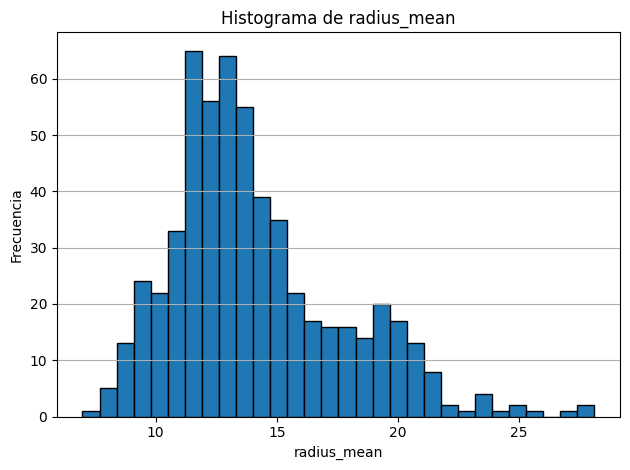

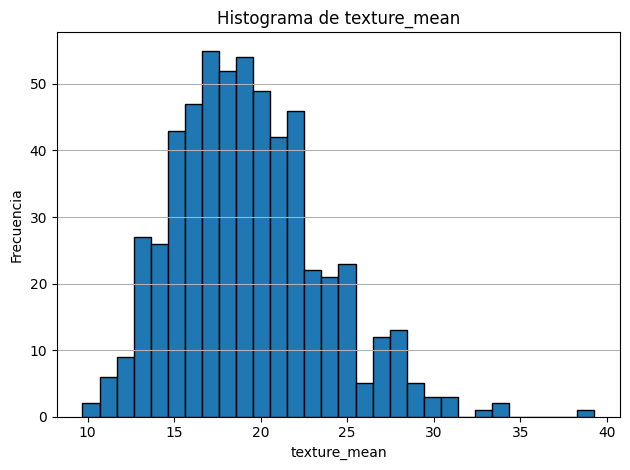

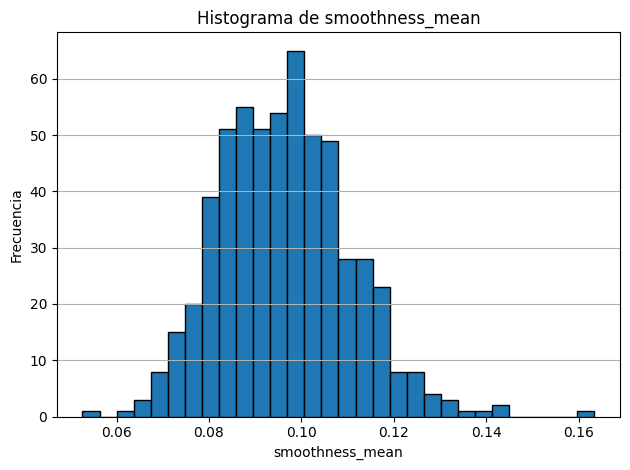

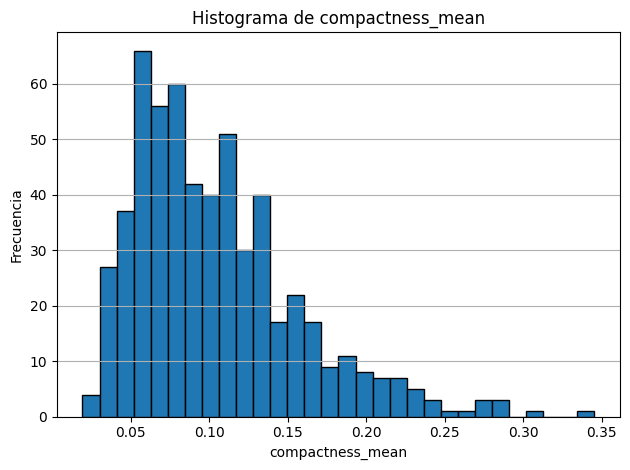

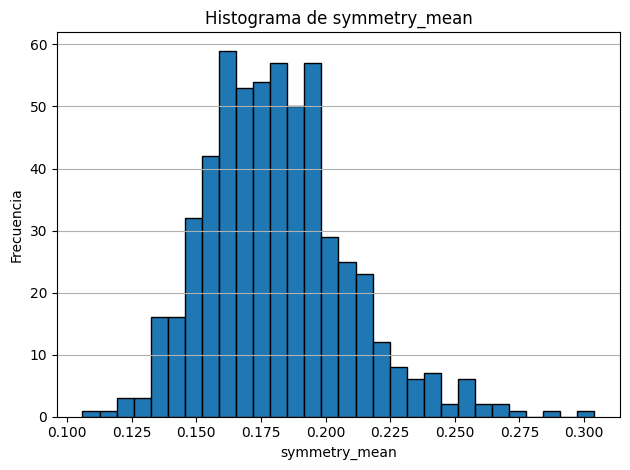

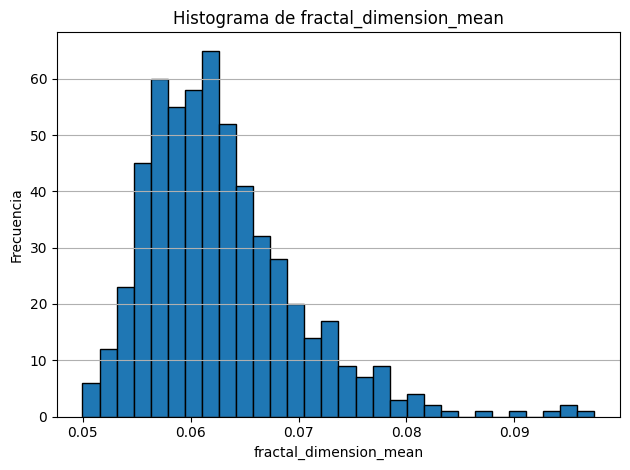

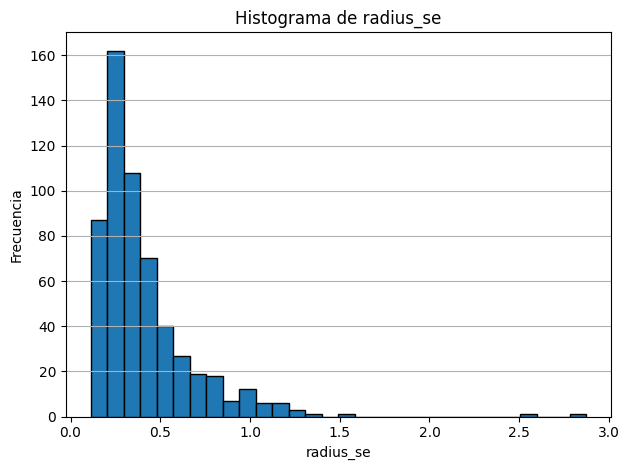

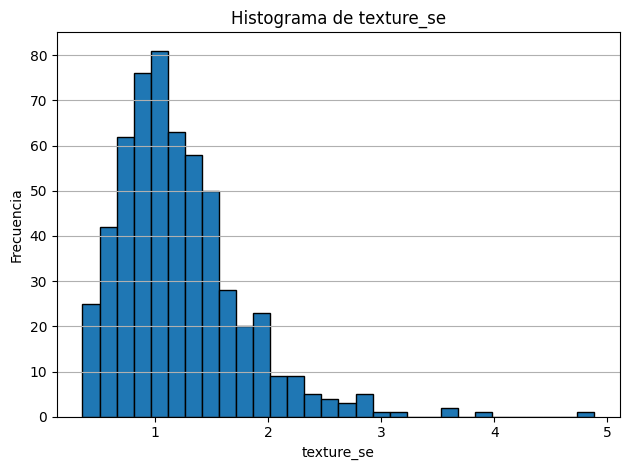

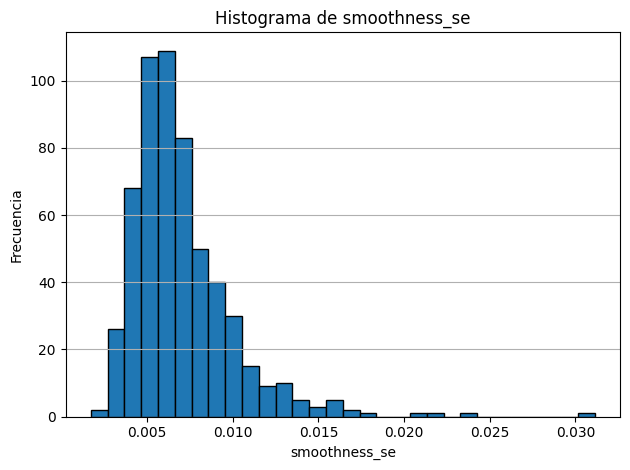

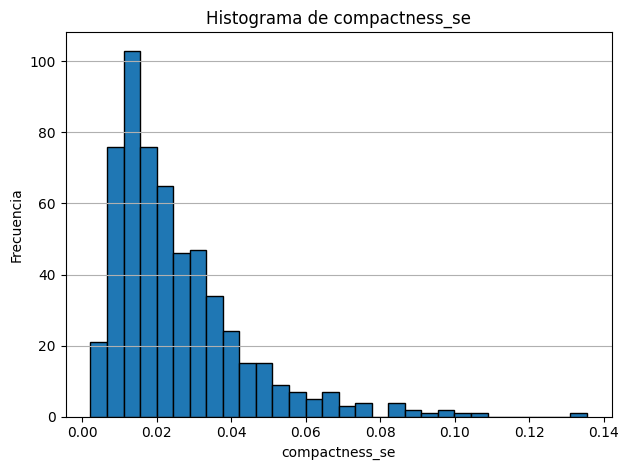

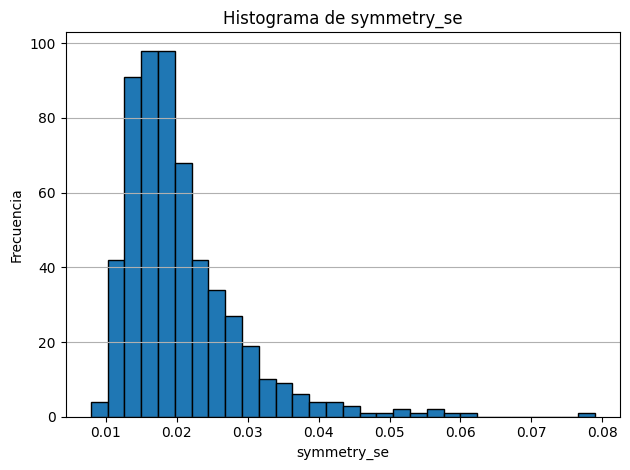

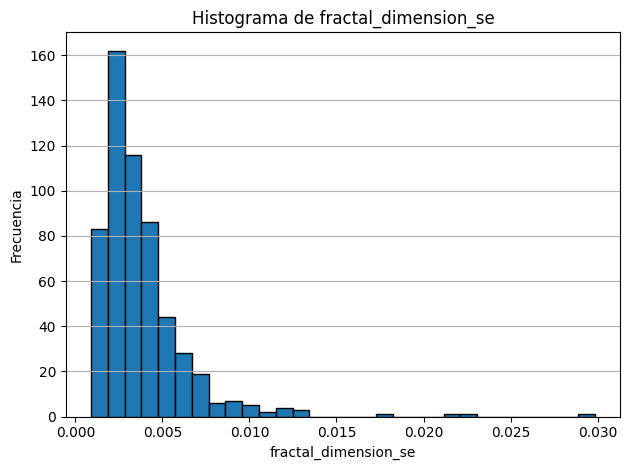

In [ ]:
for col_ in numeric_cols_names_list:
    data_with_no_worst_columns_df[col_].plot(kind='hist', bins=30, edgecolor='k')
    plt.title(f'Histograma de {col_}')
    plt.xlabel(col_)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


In [ ]:
scale_cols = list(data_with_no_worst_columns_all_statistics_df[(data_with_no_worst_columns_all_statistics_df["min"] < 0) | (data_with_no_worst_columns_all_statistics_df["max"] > 1)].index)
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

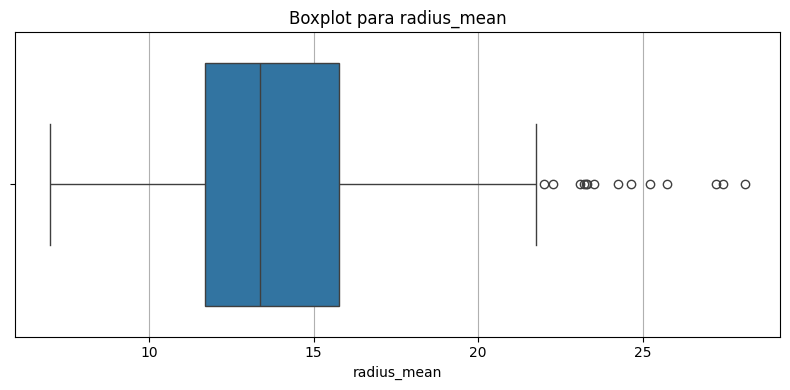

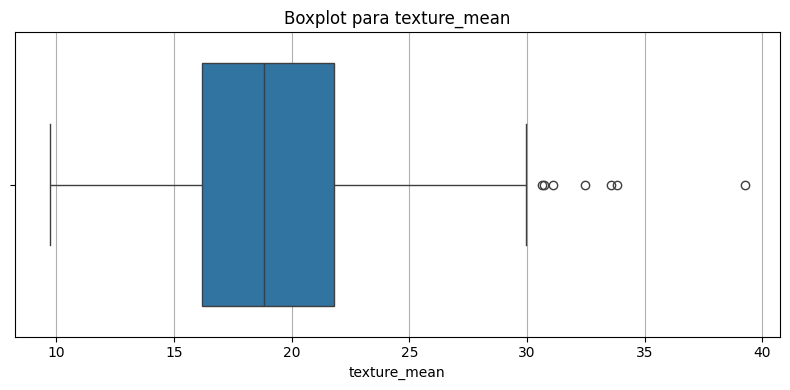

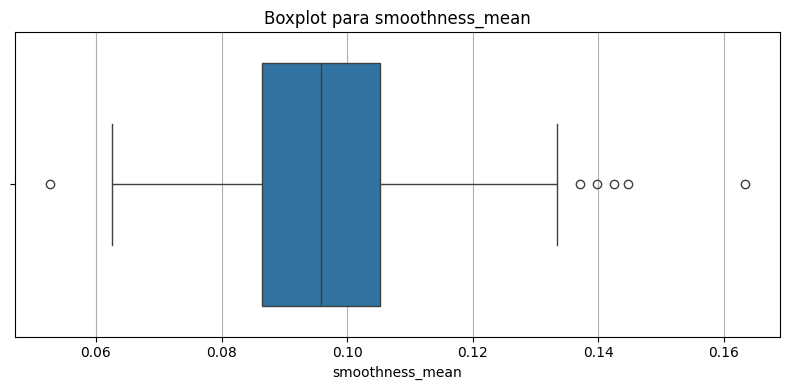

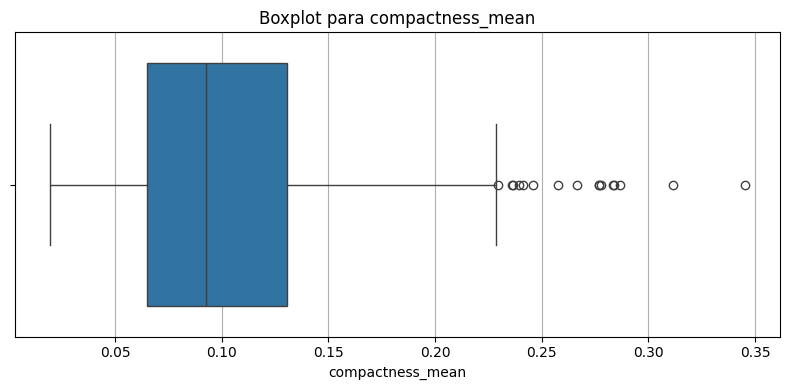

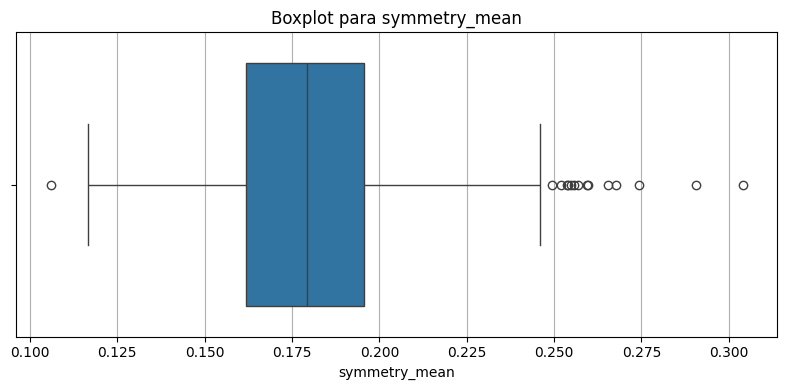

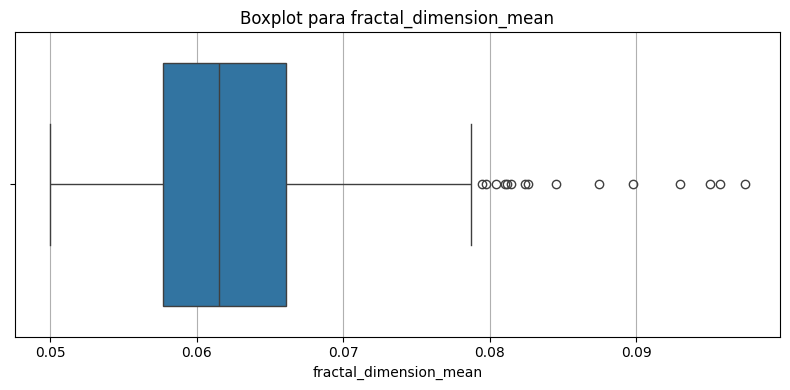

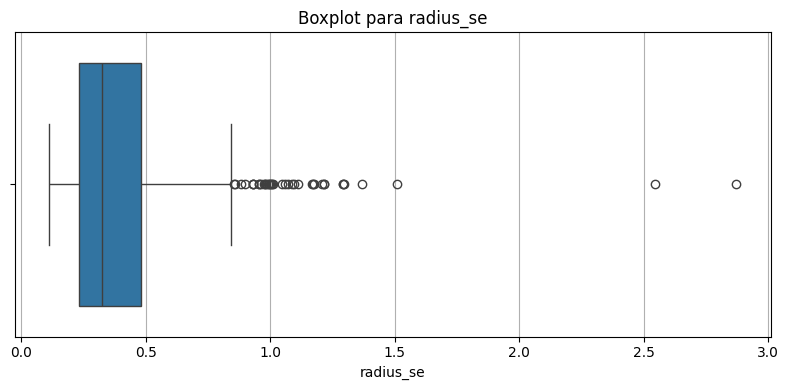

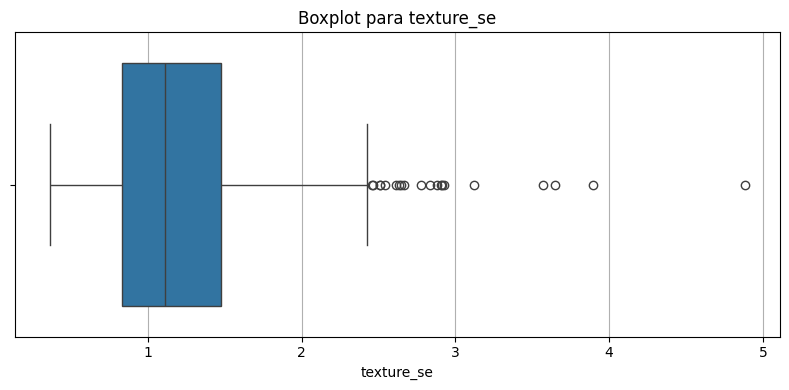

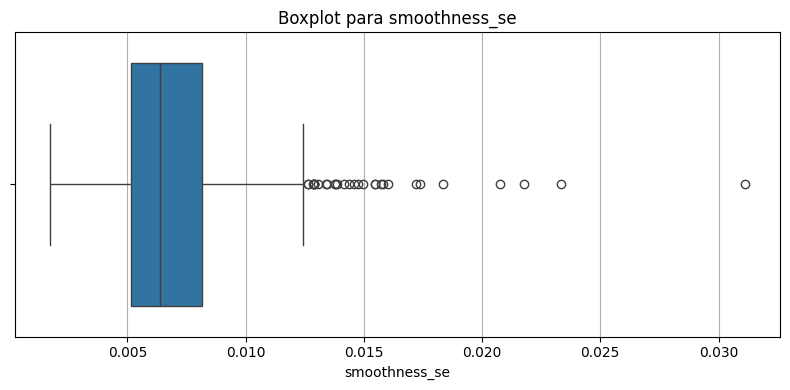

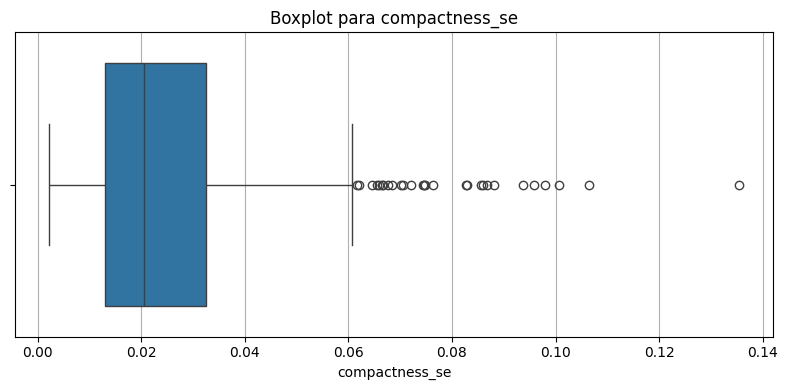

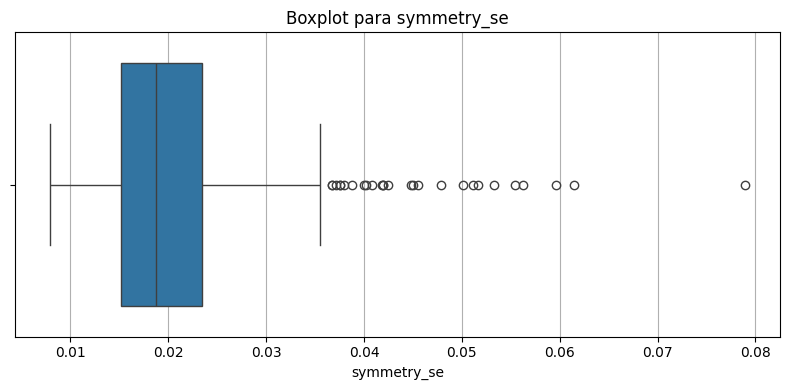

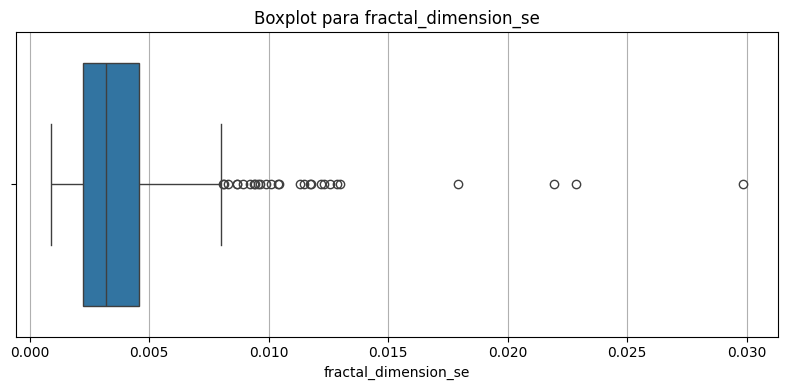

In [ ]:
for col_ in numeric_cols_names_list:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_with_no_worst_columns_df, x=col_)
    plt.title(f'Boxplot para {col_}')
    plt.grid(axis="x")
    plt.tight_layout()
    plt.show()

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
data_df = pd.read_csv('data.csv', index_col="id")
X = data_df[[x for x in data_df.columns if x != "diagnosis"]]
y = data_df["diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=1
)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

In [ ]:
worst_columns_to_drop = [x for x in X.columns if x.endswith("_worst")]
high_corr_column_to_drop = [
    "perimeter_mean",
    "area_mean",
    "concavity_mean",
    "concave points_mean",
    "perimeter_se",
    "area_se",
    "concavity_se",
    "concave points_se"
]
all_columns_to_drop = worst_columns_to_drop + high_corr_column_to_drop
len(all_columns_to_drop)

18

In [ ]:
drop_columns_transformer = FunctionTransformer(drop_columns, kw_args={'columns_to_drop': all_columns_to_drop})

In [ ]:
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', drop_columns_transformer, X.columns)
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
logr_model = make_pipeline(preprocessing, LogisticRegression())

In [ ]:
logr_model.fit(X=Xtrain, y=ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns',
                                                  FunctionTransformer(func=<function drop_columns at 0x00000286CB2CAD40>,
                                                                      kw_args={'columns_to_drop': ['radius_worst',
                                                                                                   'texture_worst',
                                                                                                   'perimeter_worst',
                                                                                                   'area_worst',
                                                                                                   'smoothness_worst',
                                                                                                   'compactness_worst',
                                                                                                   'concavity_worst',
                                                                                                   'concave '
                                                                                                   'points_worst',
                                                                                                   's...
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
ypred = logr_model.predict(Xtest)

In [ ]:
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8772


In [ ]:
precision = precision_score(ytest, ypred, pos_label='M')
print(f"Precision: {precision:.4f}")

Precision: 0.8889


In [ ]:
recall = recall_score(ytest, ypred, pos_label='M')
print(f"Recall: {recall:.4f}")

Recall: 0.7619


In [ ]:
conf_matrix = confusion_matrix(ytest, ypred, labels=['B', 'M'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True B', 'True M'], columns=['Pred B', 'Pred M'])
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        Pred B  Pred M
True B      68       4
True M      10      32


In [ ]:
print(classification_report(y_true=ytest, y_pred=ypred))

              precision    recall  f1-score   support

           B       0.87      0.94      0.91        72
           M       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def root_square_transform(X):
    return np.sqrt(X)

In [ ]:
root_square_transformer = FunctionTransformer(root_square_transform)

In [ ]:
drop_columns_transformer = FunctionTransformer(drop_columns, kw_args={'columns_to_drop': all_columns_to_drop})

In [ ]:
new_preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', drop_columns_transformer, X.columns),
        ('sqr_root', root_square_transformer, skew_cols),
        ('min_max_scaler', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2 = make_pipeline(new_preprocessing, LogisticRegression())

In [ ]:
logr_model2.fit(X=Xtrain, y=ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns',
                                                  FunctionTransformer(func=<function drop_columns at 0x00000286CB2CAD40>,
                                                                      kw_args={'columns_to_drop': ['radius_worst',
                                                                                                   'texture_worst',
                                                                                                   'perimeter_worst',
                                                                                                   'area_worst',
                                                                                                   'smoothness_worst',
                                                                                                   'compactness_worst',
                                                                                                   'concavity_worst',
                                                                                                   'concave '
                                                                                                   'points_worst',
                                                                                                   's...
                                                  FunctionTransformer(func=<function root_square_transform at 0x00000286C90FF880>),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
ypred_logr_model2 = logr_model2.predict(Xtest)

In [ ]:
accuracy = accuracy_score(ytest, ypred_logr_model2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8772


In [ ]:
precision = precision_score(ytest, ypred_logr_model2, pos_label='M')
print(f"Precision: {precision:.4f}")

Precision: 0.8889


In [ ]:
recall = recall_score(ytest, ypred_logr_model2, pos_label='M')
print(f"Recall: {recall:.4f}")

Recall: 0.7619


In [ ]:
conf_matrix = confusion_matrix(ytest, ypred_logr_model2, labels=['B', 'M'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True B', 'True M'], columns=['Pred B', 'Pred M'])
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        Pred B  Pred M
True B      68       4
True M      10      32


In [ ]:
print(classification_report(y_true=ytest, y_pred=ypred_logr_model2))

              precision    recall  f1-score   support

           B       0.87      0.94      0.91        72
           M       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
X_scaled = std_scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
X_projected = pca.fit_transform(X_scaled)
X_projected = pd.DataFrame(X_projected)

In [ ]:
total_components = X_scaled.shape[1]

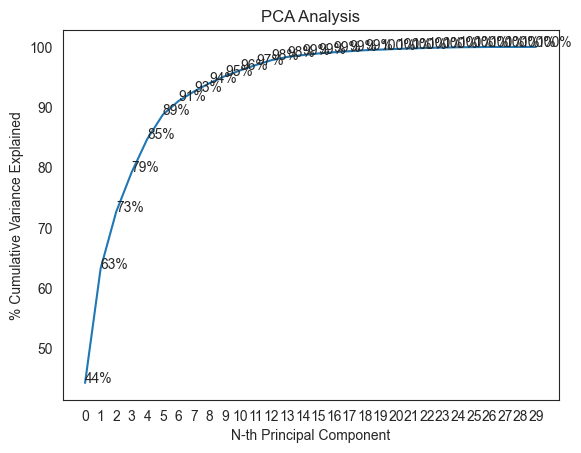

In [ ]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [ ]:
explained_cumulative_variance_array = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argwhere(explained_cumulative_variance_array > 0.99)[0][0] + 1
n_components

17

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
pca_preprocessing = ColumnTransformer(
    [
        ("std_scaler", StandardScaler(), X.columns),
        ("pca", PCA(n_components=n_components), X.columns),
    ]
)

In [ ]:
logr_model3 = make_pipeline(pca_preprocessing, LogisticRegression())

In [ ]:
logr_model3.fit(X=Xtrain, y=ytrain)

c:\Users\SoporteTI\Documents\AI Master TEC MONTERREY\TAREAS\Ciencia y Analítica de Datos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'co...
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
ypred_logr_model3 = logr_model3.predict(Xtest)

In [ ]:
accuracy = accuracy_score(ytest, ypred_logr_model3)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [ ]:
precision = precision_score(ytest, ypred_logr_model3, pos_label='M')
print(f"Precision: {precision:.4f}")

Precision: 1.0000


In [ ]:
recall = recall_score(ytest, ypred_logr_model3, pos_label='M')
print(f"Recall: {recall:.4f}")

Recall: 0.9286


In [ ]:
conf_matrix = confusion_matrix(ytest, ypred_logr_model3, labels=['B', 'M'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True B', 'True M'], columns=['Pred B', 'Pred M'])
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        Pred B  Pred M
True B      72       0
True M       3      39


In [ ]:
print(classification_report(y_true=ytest, y_pred=ypred_logr_model3))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

**RESPUESTA:**
* Recordemos que el *threshold* en los problemas de clasificación binarios es un parametro que nos permite decidir cuando una predicción pertenece a la clase positiva o no.
* El valor del *threshold* en un modelo de clasificación binario afectará directamente a las métricas del mismo:
    * Valores de threshold cercanos a 1 pueden traducirse como "estoy realmente seguro de que esta predicción pertenece a la clase positiva", lo que implica un mejor "precision" del modelo, pues las predicicones de la clase positiva serán  predicciones con un alto grado de seguridad de que perteneces a dicha clase positiva es decir el modelo arrojará pocos falsos postivios.
    * Valores de threshold no tan cercanos a 1 disminuíran el "precision" pero aumentarán el "recall", esto es lo que se conoce como "precision recall trade-off", así que tener un modelo con alto recall, implica un modelo menos estricto pero **con mayor número de predicciones de la clase positiva**.
* Cuando se trata de la detección de enfermedades, lo mejor es tener un modelo con buen recall, pues queremos que ningún posible caso de dicha enfermedad pase por alto. En contra parte un modelo con alto precision arrojará predicciones estrictas lo que incrementa el riesgo de aparición de falsos negativos.
* En conclusión, para los casos de detección de enfermedads escojemos un modelo con alto recall.